# Data Science: Credit Risk Modeling

## Summerschool Bayonne (2022)

<img src="https://cdn.corporatefinanceinstitute.com/assets/cred.png" style="width:50%" align="left">
<img src="https://www.lastminute.de/flug/lastminute/img/biarritz.jpg" style="width:50%" align="left">

# Table of Contents

**1. [Introduction](#Introduction)**
    - Data description
    
**2. [Python Libraries and data import](#Librarys)**
     <ul>
        <li>Importing Python libraries</li>
        <li>Importing the dataset</li>
     </ul>
    
**3. [Exploratory data analysis (EDA)](#Explorations)**
     <ul>
        <li>Data types</li>
        <li>Shape of the data</li>
        <li>Missing values</li>
        <li>Unique values</li>
        <li>Exploring the data using non-graphical techniques</li>
        <li>Exploring the data using graphical techniques</li>
        <li>Correlation of variables</li>
    </ul>
    
**4. [Feature Engineering](#Feature_Engineering)**
    
**5. [Preprocessing the data for modeling](#Preprocessing)**
     <ul>
        <li>Importing libraries</li>
        <li>Setting X and Y</li>
        <li>Spliting the X and Y in train and test</li>
     </ul>
    
**6. [Predictive credit risk modeling](#Predictive_modeling)**
     <ul>
         <li>Comparing different models</li>
         <li>Logistic regression</li>
         <li>Random Forest Classifier</li>
         <li>XGBoost Classifier</li>
         <li>MLP Classifier</li>
         <li>ROC-curve and AUC</li>
     </ul>

<a id="Introduction"></a> <br>


# **1. Introduction** 
<h2>Data description</h2><br>
The original data set contains 1000 persons with there attributes and a credit risk classification and is described under this <a href="https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29">link</a>. In the following exercises, we will work with a subset of the data containing the following variables/features:

<b>Risk </b> (categorical target variable: the credit risk of each person in the data set is classified as low or high)<br>
<b>Age </b>(numerical)<br>
<b>Sex </b>(categorical: male, female)<br>
<b>Job </b>(numerical: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (categorical: own, rent, for free)<br>
<b>Saving account</b> (categorical: little, moderate, quite rich, rich)<br>
<b>Checking account</b> (categorical: little, moderate, quite rich, rich)<br>
<b>Credit amount</b> (numerical: national currency)<br>
<b>Duration</b> (numerical: in month)<br>
<b>Purpose</b> (categorical: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>

<b>Selection of papers citing this data set:</b>
- Jeroen Eggermont and Joost N. Kok and Walter A. Kosters. Genetic Programming for data classification: partitioning the search space. SAC. 2004.
- Ke Wang and Shiyu Zhou and Ada Wai-Chee Fu and Jeffrey Xu Yu. Mining Changes of Classification by Correspondence Tracing. SDM. 2003.
- Avelino J. Gonzalez and Lawrence B. Holder and Diane J. Cook. Graph-Based Concept Learning. FLAIRS Conference. 2001.
- Oya Ekin and Peter L. Hammer and Alexander Kogan and Pawel Winter. Distance-Based Classification Methods. e p o r t RUTCOR ffl Rutgers Center for Operations Research ffl Rutgers University. 1996.
- Chotirat Ann and Dimitrios Gunopulos. Scaling up the Naive Bayesian Classifier: Using Decision Trees for Feature Selection. Computer Science Department University of California.
- Paul O' Dea and David Griffith and Colm O' Riordan. DEPARTMENT OF INFORMATION TECHNOLOGY. P. O'Dea.
- Paul O' Dea and Josephine Griffith and Colm O' Riordan. Combining Feature Selection and Neural Networks for Solving Classification Problems. Information Technology Department, National University of Ireland.

# **2. Python libraries and data import** <a id="Librarys"></a> <br>

### Hallo

In [1]:
# Loading the Python libraries
import pandas as pd # to work with data frames
import numpy as np # math library
import matplotlib.pyplot as plt # graphics library
import seaborn as sns # graphics library that use matplot in the background
from plotly import subplots # to define graphics using subplots
import plotly.graph_objs as go # it's like 'plt' of matplotlib.pyplot
import plotly.offline as py 
py.init_notebook_mode(connected=True) # 'offline' functionality of plotly

# Settings for warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the data
df_credit = pd.read_csv("german_credit_data.csv", index_col=0)
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,low
1,22,female,2,own,little,moderate,5951,48,radio/TV,high
2,49,male,1,own,little,NaN,2096,12,education,low
3,45,male,2,free,little,little,7882,42,furniture/equipment,low
4,53,male,2,free,little,little,4870,24,car,high
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,low
996,40,male,3,own,little,little,3857,30,car,low
997,38,male,2,own,little,NaN,804,12,radio/TV,low
998,23,male,2,free,little,little,1845,45,radio/TV,high


# **3. Exploratory data analysis (EDA)** <a id="Explorations"></a> <br>

## Data types, structure, missing values ...

In [2]:
# Information about the data set
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [3]:
# Data types only
df_credit.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [4]:
# Showing the number of unique values per variable
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [5]:
# Looking for the number of missing values
print(df_credit.isna().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [6]:
# To remove missing values
df_credit_rmna = df_credit.dropna()
print(df_credit_rmna.isna().sum())

# Compare the numer of rows in the original data set to the one where the missing values where removed
print("------------------------")
print(df_credit.shape)
print(df_credit_rmna.shape)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64
------------------------
(1000, 10)
(522, 10)


In [7]:
# Categories of categorical variables
print("Purpose: ", df_credit.Purpose.unique())
print("Sex: ", df_credit.Sex.unique())
print("Housing: ", df_credit.Housing.unique())
print("Saving accounts: ",df_credit['Saving accounts'].unique())
print("Risk: ", df_credit['Risk'].unique())
print("Checking account: ", df_credit['Checking account'].unique())

Purpose:  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex:  ['male' 'female']
Housing:  ['own' 'free' 'rent']
Saving accounts:  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk:  ['low' 'high']
Checking account:  ['little' 'moderate' nan 'rich']


## Summary statistics of numeric variables

In [8]:
df_credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## Crosstables of categorical variables

In [9]:
# Crosstab risk vs sex (absolut and as percentage)
print(pd.crosstab(df_credit["Risk"], df_credit.Sex))
print("-------------------------------------", "\n")
pct = pd.crosstab(df_credit["Risk"], df_credit.Sex) / pd.crosstab(df_credit["Risk"], df_credit.Sex).sum() * 100
print(pct.round(1))

Sex   female  male
Risk              
high     109   191
low      201   499
------------------------------------- 

Sex   female  male
Risk              
high    35.2  27.7
low     64.8  72.3


In [10]:
# Crosstab pupose vs sex (absolut and as percentage)
print(pd.crosstab(df_credit["Purpose"], df_credit.Sex))
print("-------------------------------------", "\n")
pct = pd.crosstab(df_credit["Purpose"], df_credit.Sex) / pd.crosstab(df_credit["Purpose"], df_credit.Sex).sum() * 100
print(pct.round(1))

Sex                  female  male
Purpose                          
business                 19    78
car                      94   243
domestic appliances       6     6
education                24    35
furniture/equipment      74   107
radio/TV                 85   195
repairs                   5    17
vacation/others           3     9
------------------------------------- 

Sex                  female  male
Purpose                          
business                6.1  11.3
car                    30.3  35.2
domestic appliances     1.9   0.9
education               7.7   5.1
furniture/equipment    23.9  15.5
radio/TV               27.4  28.3
repairs                 1.6   2.5
vacation/others         1.0   1.3


In [11]:
# Crosstab risk vs housing (absolut and as percentage)
print(pd.crosstab(df_credit["Risk"], df_credit.Housing))
print("-------------------------------------", "\n")
pct = pd.crosstab(df_credit["Risk"], df_credit.Housing) / pd.crosstab(df_credit["Risk"], df_credit.Housing).sum() * 100
print(pct.round(1))

Housing  free  own  rent
Risk                    
high       44  186    70
low        64  527   109
------------------------------------- 

Housing  free   own  rent
Risk                     
high     40.7  26.1  39.1
low      59.3  73.9  60.9


In [12]:
# Crosstab risk vs pupose (absolut and as percentage)
print(pd.crosstab(df_credit["Purpose"], df_credit.Risk))
print("-----------------------------------------", "\n")
pct = pd.crosstab(df_credit["Purpose"], df_credit.Risk) / pd.crosstab(df_credit["Purpose"], df_credit.Risk).sum() * 100
print(pct.round(1))

Risk                 high  low
Purpose                       
business               34   63
car                   106  231
domestic appliances     4    8
education              23   36
furniture/equipment    58  123
radio/TV               62  218
repairs                 8   14
vacation/others         5    7
----------------------------------------- 

Risk                 high   low
Purpose                        
business             11.3   9.0
car                  35.3  33.0
domestic appliances   1.3   1.1
education             7.7   5.1
furniture/equipment  19.3  17.6
radio/TV             20.7  31.1
repairs               2.7   2.0
vacation/others       1.7   1.0


<h2>The target variable and its distribuition</h2>

In [13]:
# Barplots
trace0 = go.Bar(
            x = df_credit[df_credit["Risk"] == 'low']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"] == 'low']["Risk"].value_counts().values,
            name='Low credit risk',
            marker=dict(color='#3D9970')
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"] == 'high']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"] == 'high']["Risk"].value_counts().values,
            name='High credit risk',
            marker=dict(color='#FF4136')
    )

# Data
data = [trace0, trace1]

# Layout
layout = go.Layout(
    yaxis = dict(title='Count'),
    xaxis = dict(title='Target Variable'),
    title ='Target variable distribution',
    width = 500,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [14]:
# Histograms
df_good = df_credit.loc[df_credit["Risk"] == 'low']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'high']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

# First plot
trace0 = go.Histogram(
    x=df_good,
    # histnorm='probability',
    name="Low credit risk",
    marker=dict(color='#3D9970')
)
# Second plot
trace1 = go.Histogram(
    x=df_bad,
    # histnorm='probability',
    name="High credit risk",
    marker=dict(color='#FF4136')
)
# Third plot
trace2 = go.Histogram(
    x=df_age,
    # histnorm='probability',
    name="Overall age",
    marker=dict(color='slategray')
)

# Creating the grid
fig = subplots.make_subplots(rows=2, 
                             cols=2, 
                             specs=[[{}, {}], [{'colspan': 2}, None]],
                             subplot_titles=('Low credit risk',
                                             'High credit risk',
                                             'Overall age distribution')
                            )

# Setting the figures
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age distribution', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

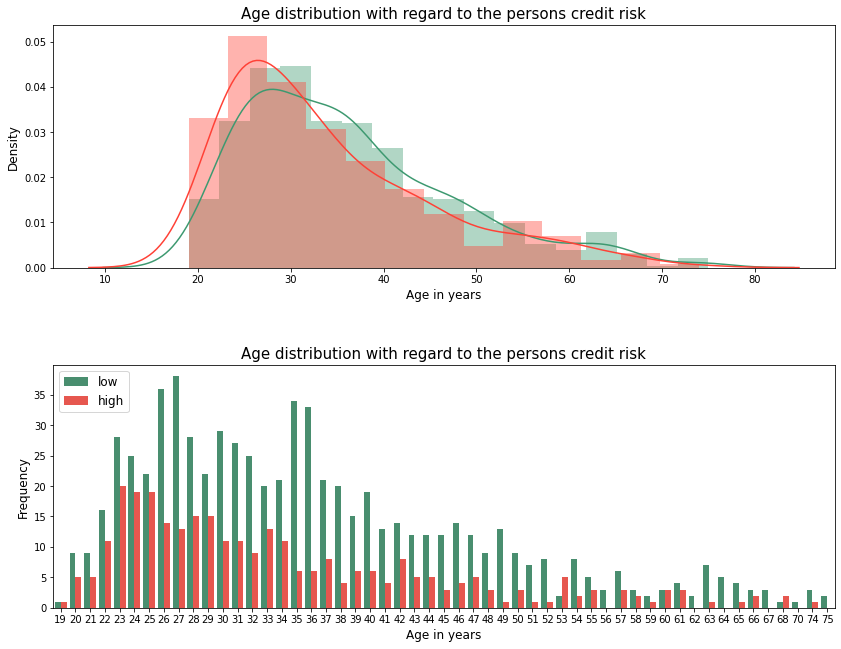

In [15]:
# Density plot and histogram
import seaborn as sns

# Create a list of colors
colors = ["#3D9970", "#FF4136"]

# Set your custom color palette
sns.set_palette( sns.color_palette(colors) )

df_good = df_credit[df_credit["Risk"] == 'low']
df_bad  = df_credit[df_credit["Risk"] == 'high']

fig, ax = plt.subplots(nrows=2, figsize=(14,12))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Density plot
g1 = sns.distplot(df_good["Age"], ax=ax[0], color="#3D9970")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], color='#FF4136')
g1.set_title("Age distribution with regard to the persons credit risk", fontsize=15)
g1.set_xlabel("Age in years", fontsize=12)
g1.set_ylabel("Density", fontsize=12)
g1.tick_params(labelsize=10)

# Histogram
g2 = sns.countplot(x="Age", data=df_credit, 
                   ax=ax[1], 
                   hue = "Risk")
g2.set_title("Age distribution with regard to the persons credit risk", fontsize=15)
g2.set_xlabel("Age in years", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.tick_params(labelsize=10)

plt.legend(fontsize='large', title_fontsize='45')

plt.show()

<h2>Creating a categorical variable containing age classes of the borrowers</h2>

In [16]:
# Define age classes
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

# Define subsets of the data with 
df_low = df_credit[df_credit["Risk"] == 'low']
df_high = df_credit[df_credit["Risk"] == 'high']

# Check risk categories in the subsets
print(df_low.Risk)
print("-----------------------------------","\n")
print(df_high.Risk)

0      low
2      low
3      low
5      low
6      low
      ... 
994    low
995    low
996    low
997    low
999    low
Name: Risk, Length: 700, dtype: object
----------------------------------- 

1      high
4      high
9      high
10     high
11     high
       ... 
979    high
980    high
981    high
983    high
998    high
Name: Risk, Length: 300, dtype: object


In [17]:
# Grouped boxplots with credit amount by age class and credit type
trace0 = go.Box(
            y=df_low["Credit amount"],
            x=df_low["Age_cat"],
            name='Low credit risk',
            marker=dict(
                color='#3D9970'
            )
)

trace1 = go.Box(
            y=df_high['Credit amount'],
            x=df_high['Age_cat'],
            name='High credit risk',
            marker=dict(
                color='#FF4136'
            )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit amount',
        zeroline=False
    ),
    xaxis=dict(
        title='Age class'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Seniors and adults schow higher range of credit amounts when looking at the bad credits.

<h2>Number of borrowers per housing type (own, rent, for free) and by target variable</h2>


In [18]:
# First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'low']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'low']["Housing"].value_counts().values,
    name='Low credit risk',
    marker=dict(color='green')
)

# Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'high']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'high']["Housing"].value_counts().values,
    name='High credit risk',
     marker=dict(color='red')
    
)

data = [trace0, trace1]

layout = go.Layout(
    title='Number of borrowers by housing type and credit risk'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

We can see that the category 'own' is at much lower risk compared to the other categories (smaller percentage at risk).

<h3>Distribution of credit amount by housing type</h3>

In [19]:
# Violine plots
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_low['Housing'],
            "y": df_low['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Low credit risk',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#3D9970'
            }
        },
        {
            "type": 'violin',
            "x": df_high['Housing'],
            "y": df_high['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'High credit risk',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#FF4136'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 2,
        "violinmode": "overlay"
    }
}

py.iplot(fig, filename = 'violin/split', validate = False)

Highest values come from category "free", and we have a different distribution by credit risk.

<h2>Looking at the differences with reference to sex</h2>

In [20]:
# Barplots & grouped boxplots

# First plot (a)
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'low']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'low']["Sex"].value_counts().values,
    name='Low credit risk',
    marker=dict(color='#3D9970')
)

# Second plot (b)
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'high']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'high']["Sex"].value_counts().values,
    name="High credit risk",
    marker=dict(color='#FF4136')
)

# Third plot (c)
trace2 = go.Box(
    x = df_credit[df_credit["Risk"] == 'low']["Sex"],
    y = df_credit[df_credit["Risk"] == 'low']["Credit amount"],
    name=trace0.name,
    marker=dict(color='#3D9970')
)

# Fourth plot (d)
trace3 = go.Box(
    x = df_credit[df_credit["Risk"] == 'high']["Sex"],
    y = df_credit[df_credit["Risk"] == 'high']["Credit amount"],
    name=trace1.name,
    marker=dict(color='#FF4136')
)

# Data
data = [trace0, trace1, trace2, trace3]

# Figure layout
fig = subplots.make_subplots(rows=1, cols=2, 
                             subplot_titles=('Number of borrowers by sex', 
                                             'Credit amount by sex'))
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, 
                     width=900, 
                     title='Number of borrowers and credit amount by sex', 
                     boxmode='group'
                    )
py.iplot(fig, filename='sex-subplot')

Here we can see that the number of low risk credits borrowed by men is comparably high.

In [21]:
# Barplots

# First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'low']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'low']["Job"].value_counts().values,
    name='Low credit risk',
    marker=dict(color='#3D9970')
)

# Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'high']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'high']["Job"].value_counts().values,
    name="High credit risk",
    marker=dict(color='#FF4136')
)

# Data
data = [trace0, trace1]

# Figure layout
layout = go.Layout(
    title='Number of borrowers by job type and credit risk'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [22]:
# Grouped boxplots
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Low credit risk',
    marker=dict(color='#3D9970')
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='High credit risk',
    marker=dict(color='#FF4136')
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit amount by job type'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [23]:
# Violine plots
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Low credit risk',
            "scalegroup": 'No',
            "name": 'Low credit risk',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#3D9970'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'High credit risk',
            "scalegroup": 'No',
            "name": 'High credit risk',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#FF4136'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}

py.iplot(fig, filename = 'Age-Housing', validate = False)

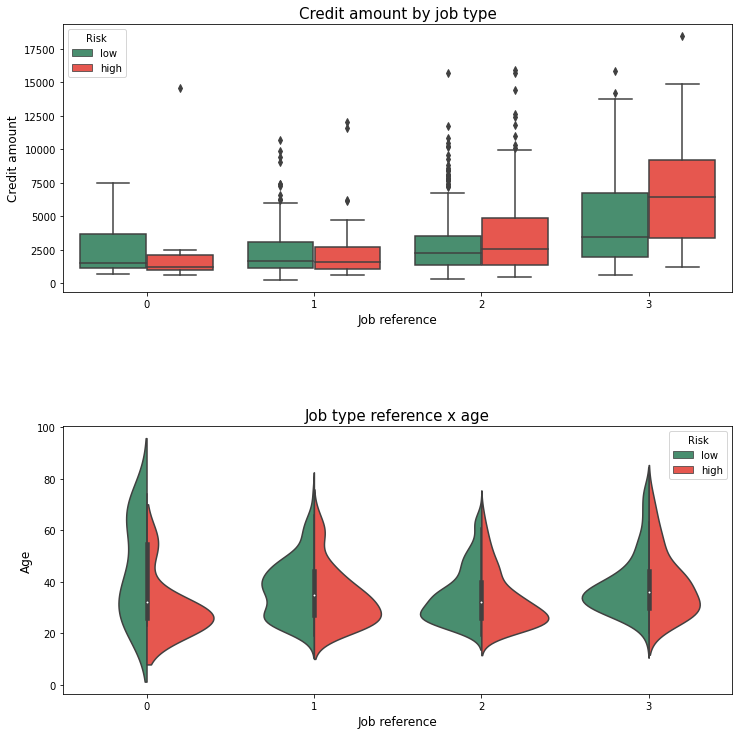

In [24]:
# Create a list of colors
colors = ["#3D9970", "#FF4136"]

# Set your custom color palette
sns.set_palette( sns.color_palette(colors) )

# Grouped boxplots and violine plots
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", 
                 y="Credit amount", 
                 data=df_credit,
                 ax=ax[0], 
                 hue="Risk")
g1.set_title("Credit amount by job type", fontsize=15)
g1.set_xlabel("Job reference", fontsize=12)
g1.set_ylabel("Credit amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="Risk", split=True)
g2.set_title("Job type reference x age", fontsize=15)
g2.set_xlabel("Job reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [25]:
# Looking at the distribution of the credit amount
import plotly.figure_factory as ff
import numpy as np

# Subsets
df_good = df_credit[df_credit["Risk"] == 'low']
df_bad  = df_credit[df_credit["Risk"] == 'high']

# Log-transformed data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]
group_labels = ['Low credit risk', 'High credit risk']

# Create distplot with custom bin_size
colors = ['#3D9970', '#FF4136']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, colors=colors)

# Plot
py.iplot(fig, filename='Distplot with multiple datasets')

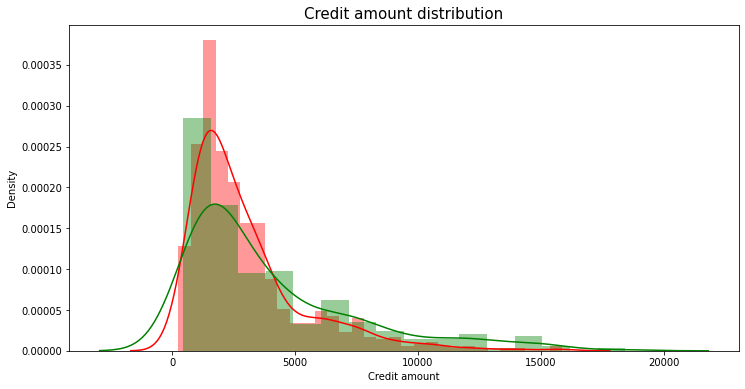

In [26]:
# Plotting the distribution of credit amount
plt.figure(figsize=(12,6))

# Subsets
df_good = df_credit[df_credit["Risk"] == 'low']
df_bad  = df_credit[df_credit["Risk"] == 'high']

g = sns.distplot(df_good['Credit amount'], color='r')
g = sns.distplot(df_bad["Credit amount"], color='g')
g.set_title("Credit amount distribution", fontsize=15)
plt.show()

Distribution of saving accounts by risk

In [27]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit',
    marker=dict(color='#3D9970')
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit',
    marker=dict(color='#FF4136')
)

box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit',
    marker=dict(color='#3D9970')
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit',
    marker=dict(color='#FF4136')
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit',
    marker=dict(color='#3D9970')
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit',
    marker=dict(color='#FF4136')
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = subplots.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Number of saving accounts','Credit amount by savings accounts', 
                                          'Age of borrowers by saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)

fig['layout'].update(height=700, width=900, title='Saving accounts exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')

We can see here that bad credits often occur when there are only little savings.

Description of Distribuition Saving accounts by Risk:  
Risk             high  low
Saving accounts           
little            217  386
moderate           34   69
quite rich         11   52
rich                6   42


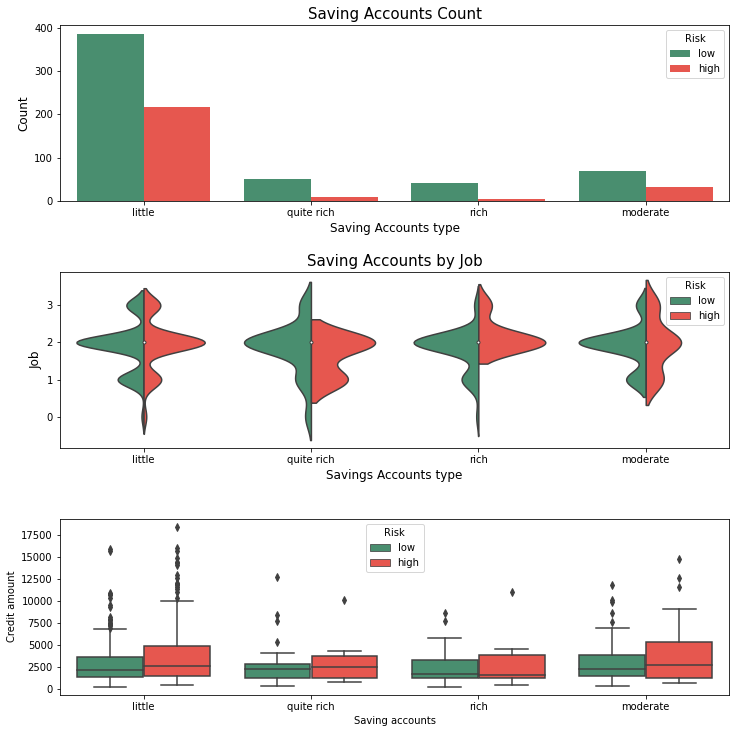

In [28]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

Values describe: 
Risk                 high  low
Purpose                       
business               34   63
car                   106  231
domestic appliances     4    8
education              23   36
furniture/equipment    58  123
radio/TV               62  218
repairs                 8   14
vacation/others         5    7


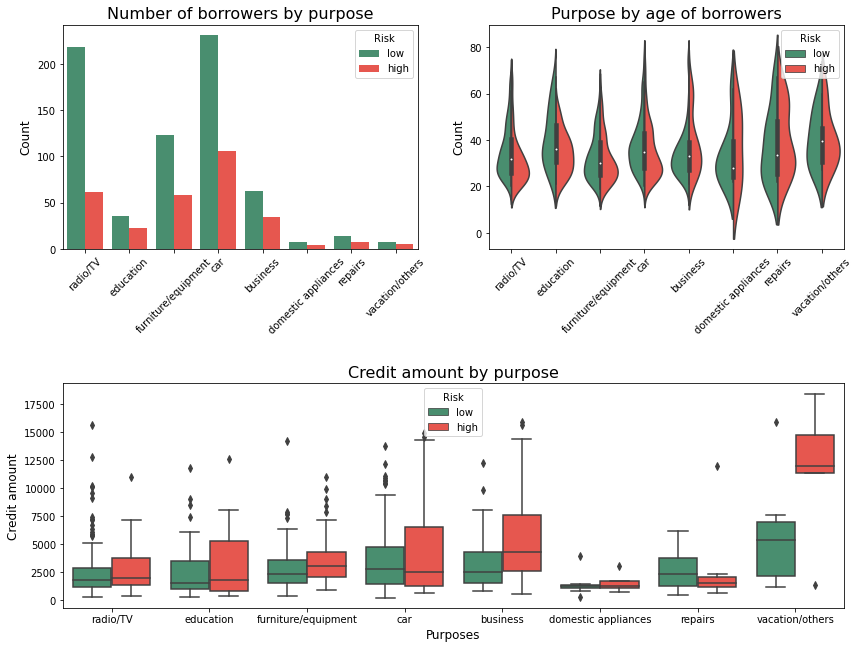

In [29]:
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Number of borrowers by purpose", fontsize=16)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purpose by age of borrowers", fontsize=16)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df_credit, 
                 hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit amount", fontsize=12)
g2.set_title("Credit amount by purpose", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Duration of the loans distribuition and density

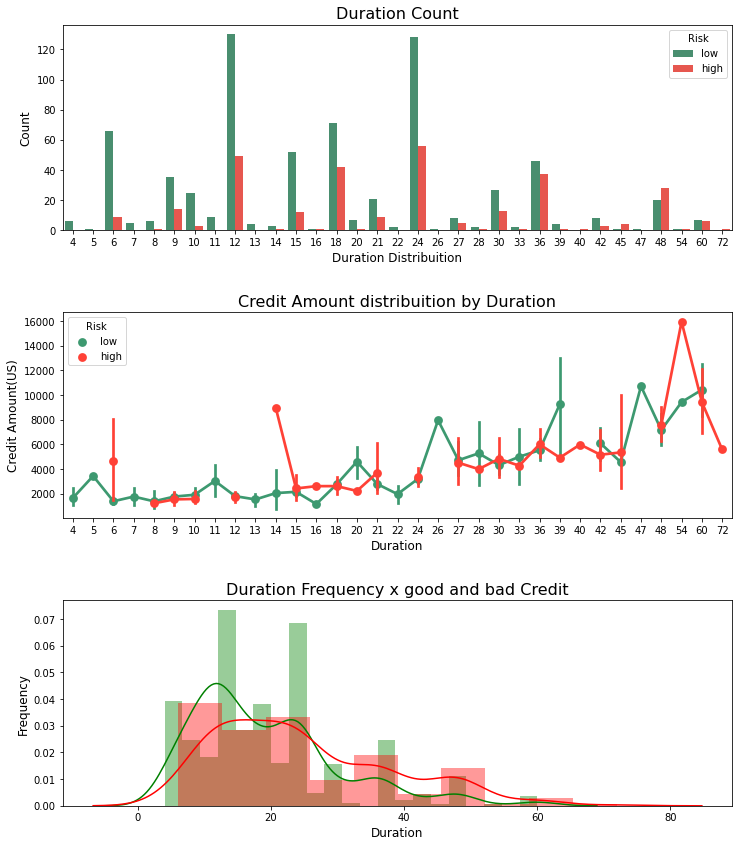

In [30]:
plt.figure(figsize = (12,14))

g = plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
                  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=16)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df_credit,
                   hue="Risk")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=16)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=16)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

Interesting, we can see that the highest duration have higher credit amounts. The highest density is between 15 and 24 months.

<h2> Exploring the Checking account variable </h2>

In [31]:
# First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'low']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'low']["Checking account"].value_counts().values,
    name='Good credit Distribuition',
    marker=dict(color='#3D9970')
)

# Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'high']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'high']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition",
    marker=dict(color='#FF4136')
)

data = [trace0, trace1]

layout = go.Layout(
    title='Number of borrowers by checking account type',
    xaxis=dict(title='Checking account type'),
    yaxis=dict(title='Number of borrowers'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'Age-ba', validate = False)

In [32]:
df_good = df_credit[df_credit["Risk"] == 'low']
df_bad = df_credit[df_credit["Risk"] == 'high']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Low credit risk',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='High credit risk',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


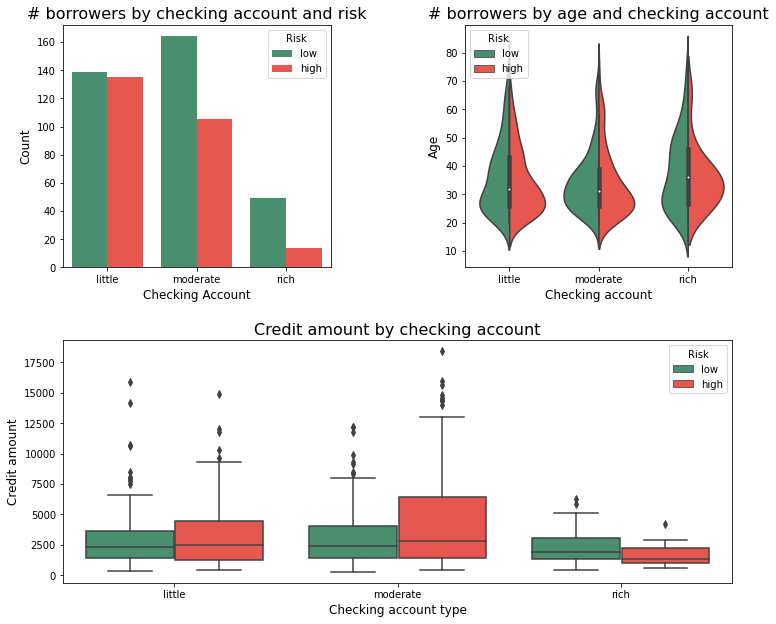

In [33]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(2,2,1)
g = sns.countplot(x="Checking account", data=df_credit, hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("# borrowers by checking account and risk", fontsize=16)

g1 = plt.subplot(2,2,2)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, hue = "Risk", split=True)
g1.set_xlabel("Checking account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("# borrowers by age and checking account", fontsize=16)

g2 = plt.subplot(2,1,2)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk')
g2.set_xlabel("Checking account type", fontsize=12)
g2.set_ylabel("Credit amount", fontsize=12)
g2.set_title("Credit amount by checking account", fontsize=16)

plt.subplots_adjust(wspace = 0.5, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

In [34]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


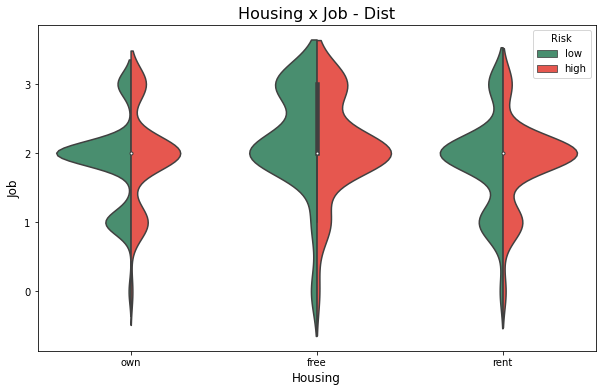

In [35]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=16)

plt.show()

In [36]:
print(pd.crosstab(df_credit["Checking account"], df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [37]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [38]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


# **4. Feature Engineering** <a id="Feature_Engineering"></a> <br>

In [39]:
# Function for one hot encoding of features
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [40]:
# Current data set
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,low,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,high,Student
2,49,male,1,own,little,NaN,2096,12,education,low,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,low,Adult
4,53,male,2,free,little,little,4870,24,car,high,Adult
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,low,Young
996,40,male,3,own,little,little,3857,30,car,low,Adult
997,38,male,2,own,little,NaN,804,12,radio/TV,low,Adult
998,23,male,2,free,little,little,1845,45,radio/TV,high,Student


## Transforming the categorical data into 0/1 dummy variables

In [41]:
df_credit_model = df_credit.copy()

df_credit_model['Saving accounts']  = df_credit_model['Saving accounts'].fillna('no_inf')
df_credit_model['Checking account'] = df_credit_model['Checking account'].fillna('no_inf')

# Purpose to dummies
df_credit_model = df_credit_model.merge(pd.get_dummies(df_credit_model.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
# Sex feature to dummies
df_credit_model = df_credit_model.merge(pd.get_dummies(df_credit_model.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit_model = df_credit_model.merge(pd.get_dummies(df_credit_model.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit_model = df_credit_model.merge(pd.get_dummies(df_credit_model["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit_model = df_credit_model.merge(pd.get_dummies(df_credit_model.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit_model = df_credit_model.merge(pd.get_dummies(df_credit_model["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit_model = df_credit_model.merge(pd.get_dummies(df_credit_model["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

## Remove the original features from the data set

In [42]:
# Remove original features from the data set
del df_credit_model["Saving accounts"]
del df_credit_model["Checking account"]
del df_credit_model["Purpose"]
del df_credit_model["Sex"]
del df_credit_model["Housing"]
del df_credit_model["Age_cat"]
del df_credit_model["Risk"]
del df_credit_model["Risk_low"]

# Show header info
df_credit_model.head(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_high,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,1169,6,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,22,2,5951,48,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,49,1,2096,12,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,45,2,7882,42,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,53,2,4870,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Correlation of features

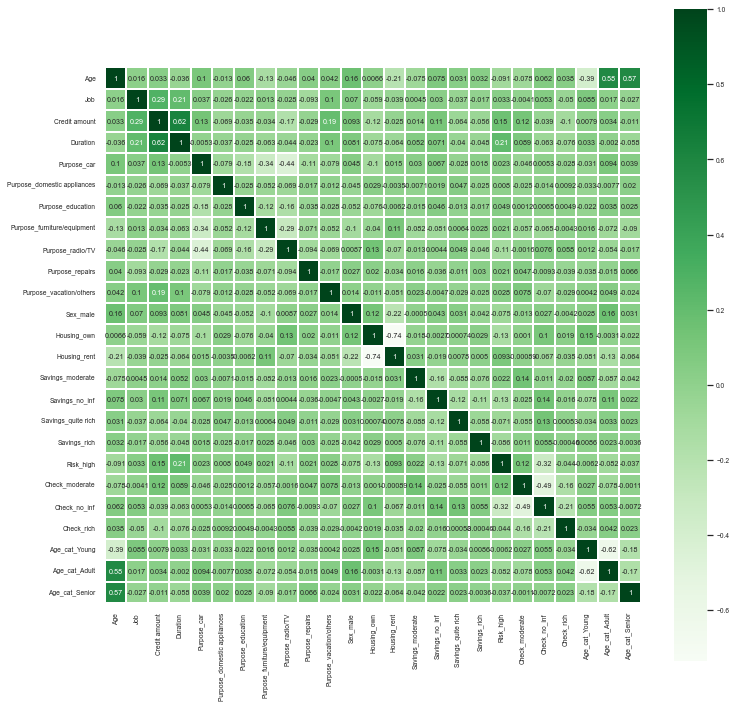

In [43]:
# Note that this is primarily useful for non-binary variables
plt.figure(figsize=(12,12))
sns.set(font_scale=0.6)
sns.heatmap(df_credit_model.astype(float).corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True,
            linecolor='white', 
            annot=True,
            cmap='Greens',
            fmt='.2g')
plt.show()

# **5. Preprocessing the data for modeling** <a id="Preprocessing"></a> <br>
- Importing ML librarys
- Setting the X and y variables
- Normalize the X variables
- Splitting the data into train and test data

In [44]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV

# Models/Classifier to be compared
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

### Transforming features using MinMaxScaling

In [45]:
# Creating the X and y
X = df_credit_model.drop('Risk_high', 1).values
y = df_credit_model["Risk_high"].values

# Initialize the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Transform the data
scaled_X = scaler.fit_transform(X)

print("Target feature (y):", "\n", y)
print("\n")
print("Matrix with scaled features (X):", "\n", scaled_X)

# Spliting X and y into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.25, random_state=42)

Target feature (y): 
 [0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 

# **6. Predictive credit risk modeling** <a id="Predictive_modeling"></a> <br>

### Compare different models in order to find a suitable modeling method

Almost all models show comparable low recall values. We will apply grid search to optimize the hyper parameter settings.

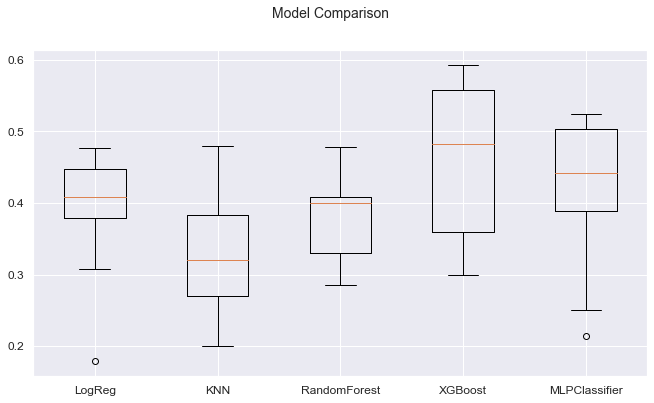

In [46]:
# To feed the random state
seed = 7

# Prepare models
models = []
models.append(('LogReg', LogisticRegression())) # Logistic regression
models.append(('KNN', KNeighborsClassifier()))  # K-Nearest Neighbors Classifier
models.append(('RandomForest', RandomForestClassifier())) # Random Forest Classifier
models.append(('XGBoost', XGBClassifier())) # XGBoost Classifier
models.append(('MLPClassifier', MLPClassifier())) # Multi-Layer Perceptron (MLP) Classifier

# Evaluation of different models using the default settings
results = []
names = []
scoring = 'recall'

# Cross validation
from IPython.utils import io
with io.capture_output() as captured:
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# Boxplot for model comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Model Comparison', fontsize=14)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.tick_params(labelsize=12)
plt.show()

The recall is comparably low. Overall, the XGBoost model provides the highest prediction accuracy.

### Using Logistic Regression model to predict the credit risk

In [47]:
lr = LogisticRegression(random_state=5)
lr.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [48]:
# Testing the models prediction accuracy by using the test data
y_pred = lr.predict(X_test)

# Confusion matrix and classification report
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Confusion matrix: 
 [[161  17]
 [ 47  25]]


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       178
           1       0.60      0.35      0.44        72

    accuracy                           0.74       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.72      0.74      0.72       250



### Using a Random Forest model to predict the credit risk

In [49]:
# Hyperparameter grid search
param_grid = {"max_depth": [3,5,7,10,20,None],
              "n_estimators":[3,5,10,25,50,100],
              "max_features": [4,7,15,20,25]}

# Creating the classifier
rf = RandomForestClassifier(random_state=2)

# Grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='recall', verbose=4)

# Model run (output is captured)
from IPython.utils import io
with io.capture_output() as captured:
    grid_search.fit(X_train, y_train)

In [50]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5127536231884058
{'max_depth': 20, 'max_features': 25, 'n_estimators': 5}


In [51]:
rf = RandomForestClassifier(max_depth=20, max_features=25, n_estimators=5, random_state=2)

# Train the model with the best parameter setting
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=25, n_estimators=5,
                       random_state=2)

In [52]:
# Testing the models prediction accuracy by using the test data
y_pred = rf.predict(X_test)

# Confusion matrix and classification report
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Confusion matrix: 
 [[137  41]
 [ 35  37]]


              precision    recall  f1-score   support

           0       0.80      0.77      0.78       178
           1       0.47      0.51      0.49        72

    accuracy                           0.70       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.70      0.70      0.70       250



### Using a XGBoost model to predict the credit risk

In [53]:
# Hyperparameter grid search
# For details see: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python
param_grid = { 'min_child_weight': [1.0, 2.0, 5.0],
               'subsample': [0.5, 0.6, 0.8],
               'colsample_bytree': [0.5, 0.8, 1.0],
               'max_depth': [5, 10, 20]
              }

# Creating the classifier
xgb = XGBClassifier(learning_rate=0.05, 
                    n_estimators=200, 
                    objective='binary:logistic',
                    eval_metric = "logloss",
                    silent=True,
                    nthread=2, 
                    random_state=2
                   )
# Grid search
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='recall', verbose=4)

# Model run (output is captured)
from IPython.utils import io
with io.capture_output() as captured:
    grid_search.fit(X_train, y_train)

In [54]:
# Results from the hyperparameter grid search
print(grid_search.best_score_)
print(grid_search.best_params_)

0.4731400966183575
{'colsample_bytree': 1.0, 'max_depth': 20, 'min_child_weight': 1.0, 'subsample': 0.8}


In [55]:
# Fill in the results from the hyperparameter grid search
xgb = XGBClassifier(learning_rate=0.05, 
                    n_estimators=10000, 
                    objective='binary:logistic',
                    eval_metric = "logloss",
                    colsample_bytree=0.8, 
                    gamma=1.5, 
                    max_depth=5, 
                    min_child_weight=1, 
                    subsample=0.6,
                    nthread=2,
                    random_state=2
                   )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=2, nthread=2, num_parallel_tree=1,
              predictor='auto', random_state=2, reg_alpha=0, ...)

In [56]:
# Testing the models prediction accuracy by using the test data
y_pred = xgb.predict(X_test)

# Confusion matrix and classification report
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Confusion matrix: 
 [[152  26]
 [ 34  38]]


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       178
           1       0.59      0.53      0.56        72

    accuracy                           0.76       250
   macro avg       0.71      0.69      0.70       250
weighted avg       0.75      0.76      0.76       250



### Using a Neural Network to predict the credit risk

In [57]:
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(5, 20), # in brackets: (number of hidden layers, number of units per layer)
                    random_state=1
                   )
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 20), random_state=1,
              solver='lbfgs')

In [58]:
# Printing the training score
print("Accuracy score (based on train data):", "{:.4f}".format(clf.score(X_train, y_train)))

Accuracy score (based on train data): 0.8053


In [59]:
# Printing the test score
print("Accuracy score (based on test data):", "{:.4f}".format(clf.score(X_test, y_test)))

Accuracy score (based on test data): 0.7120


In [60]:
# Testing the models prediction accuracy by using the test data
y_pred = clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[137  41]
 [ 31  41]]


              precision    recall  f1-score   support

           0       0.82      0.77      0.79       178
           1       0.50      0.57      0.53        72

    accuracy                           0.71       250
   macro avg       0.66      0.67      0.66       250
weighted avg       0.72      0.71      0.72       250



## Exploring the prediction accuracy using the ROC curve

Area under the curve (AUC) of LogReg:       0.7450
Area under the curve (AUC) of RandomForest: 0.6887
Area under the curve (AUC) of XGBoost:      0.7466
Area under the curve (AUC) of MLP:          0.6939


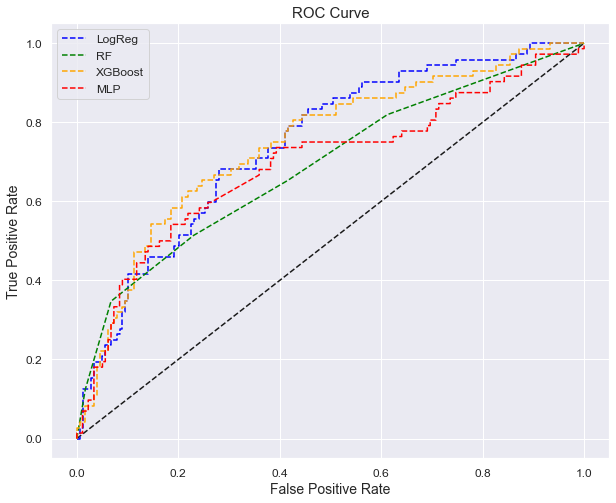

In [61]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import roc_curve

# Predicting the probability (i.e. not only 0/1 values but values ranging from 0 to 1)
y_pred_prob_lr  = lr.predict_proba(X_test)[:,1]
y_pred_prob_rf  = rf.predict_proba(X_test)[:,1]
y_pred_prob_xgb = xgb.predict_proba(X_test)[:,1]
y_pred_prob_clf = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_prob_rf)
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_prob_xgb)
fpr_clf, tpr_clf, thresholds = roc_curve(y_test, y_pred_prob_clf)

# Area under the curve (AUC)
print("Area under the curve (AUC) of LogReg:      ", "{:.4f}".format(metrics.auc(fpr_lr, tpr_lr) ) )
print("Area under the curve (AUC) of RandomForest:", "{:.4f}".format(metrics.auc(fpr_rf, tpr_rf) ) )
print("Area under the curve (AUC) of XGBoost:     ", "{:.4f}".format(metrics.auc(fpr_xgb, tpr_xgb) ) )
print("Area under the curve (AUC) of MLP:         ", "{:.4f}".format(metrics.auc(fpr_clf, tpr_clf) ) )

# Plot the ROC curves
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--') # diagonal line representing model predictions by chance

line1, = plt.plot(fpr_lr, tpr_lr, color='blue', label="LogReg", linestyle='--', linewidth=1.5)
line2, = plt.plot(fpr_rf, tpr_rf, color='green', label="RF", linestyle='--', linewidth=1.5)
line3, = plt.plot(fpr_xgb, tpr_xgb, color='orange', label="XGBoost", linestyle='--', linewidth=1.5)
line4, = plt.plot(fpr_clf, tpr_clf, color='red', label="MLP", linestyle='--', linewidth=1.5)

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)

# Legend
plt.legend(handles=[line1, line2, line3, line4], loc='upper left', fontsize=12)
plt.show()

## Fit and save a simplified XGBoost model for the model deployment exercise

In [62]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Creating the X and y
X = df_credit[["Age", "Job", "Credit amount", "Duration"]].values
y = df_credit["Risk"].values

# Label encoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

joblib.dump(encoder, "encoder.pkl")

# Spliting X and y into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print("Target feature (y_test):", "\n", y_test[:12])
print("\n")
print("Matrix with features (X_test):", "\n", X_test[:12])
print("--------------------------------------", "\n")

# Creating the classifier
xgb = XGBClassifier(learning_rate=0.05, 
                    n_estimators=200, 
                    objective='binary:logistic',
                    eval_metric = "logloss",
                    silent=True,
                    nthread=2, 
                    random_state=2
                   )

# Model run
from IPython.utils import io
with io.capture_output() as captured:
    xgb.fit(X_train, y_train)

# Testing the models prediction accuracy by using the test data
y_pred = xgb.predict(X_test)
print("Predictions (y_test): \n", y_pred, "\n")

# Confusion matrix and classification report
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(xgb, "model.pkl")

# Read models and make predictions
classifier_loaded = joblib.load("model.pkl")
encoder_loaded = joblib.load("encoder.pkl")

# Prediction
X_manual_test = [[24, 3, 25000, 36]]
print("Test-Prediction with features: 'Age', 'Job', Credit amount', 'Duration': \n", X_manual_test, "\n")
prediction = encoder_loaded.inverse_transform(xgb.predict(X_manual_test))
print("Prediction of credit risk: \n", prediction)

Target feature (y_test): 
 [0 1 1 1 1 1 1 1 1 1 1 0]


Matrix with features (X_test): 
 [[  24    2 3190   18]
 [  35    1 4380   18]
 [  32    2 2325   24]
 [  23    2 1297   12]
 [  35    3 7253   33]
 [  64    1 2384   24]
 [  41    2 2116    6]
 [  20    2  585   12]
 [  26    2 3577    9]
 [  27    2 8613   27]
 [  28    1  484    6]
 [  34    2 3965   42]]
-------------------------------------- 

Predictions (y_test): 
 [1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0] 

Confusion matrix: 
 [[ 12  60]
 [ 21 157]]


              p

## References
<ul> 
<li> <a href="https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29">German Credit Data</a></li>
<li> <a href="https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline?scriptVersionId=7037624"> German Credit risk [FinancialEDA]</a> by Leonardo Ferreira</li>
</ul>